In [19]:
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile
from scipy.signal import butter, freqz, filtfilt, firwin, iirnotch, lfilter



import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal as sps

import os

48000


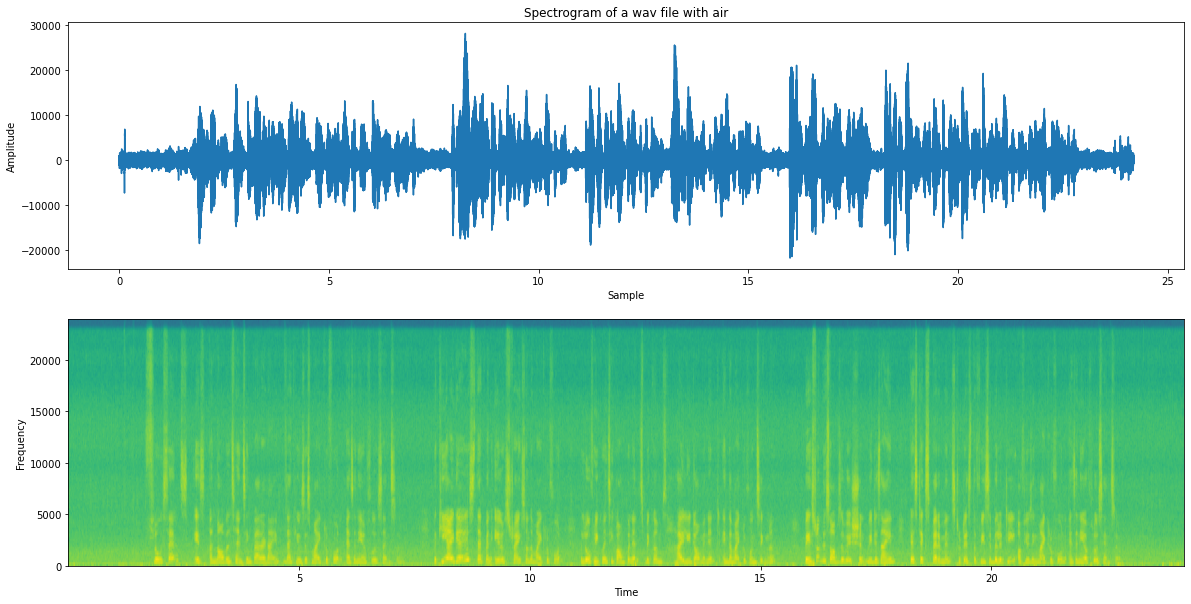

In [20]:
# Read the wav file (mono)
WAV_FILE_NAME  = 'fs.wav'
samplingFrequency, signalData = wavfile.read(WAV_FILE_NAME)
times = np.arange(len(signalData))/samplingFrequency


print(samplingFrequency)
 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with air')

 

plot.plot(times,signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

In [23]:
def Filter(signal, high_cut):
    fs = samplingFrequency
    order = 4
#     fs = 50.0  # sample rate, Hz
    cutoff = 250  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

    # Create the filter.
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    # Frequency response graph
    w, h = freqz(b, a)
    plt.figure(figsize=(10,4))

    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5 * np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5 * fs)
    plt.title('Lowpass Filter Frequency Response')
    plt.xlabel('Frequency [Hz]')
    plt.grid()
    plt.show()

    # Apply the butterworth filter on the signal
    data = filtfilt(b, a, signal)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.subplot(221)

    plt.plot(signal)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('before filtering')

    plt.subplot(222)
    plt.plot(data)
    # plt.specgram(data, Fs=samplingFrequency)
    plt.xlabel('sample')
    plt.ylabel('Amplitude')
    plt.title('after filtering at' +str(high_cut)+'Hz')


    plt.subplot(223)
    plt.specgram(signal, Fs=fs)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('before filtering')

    plt.subplot(224)
    plt.specgram(data, Fs=1000)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('after filtering at' +str(high_cut)+'Hz')
    plt.show()

    return(data)




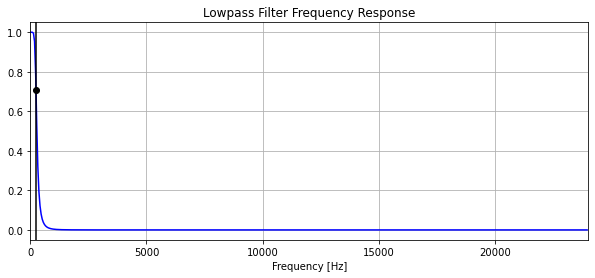

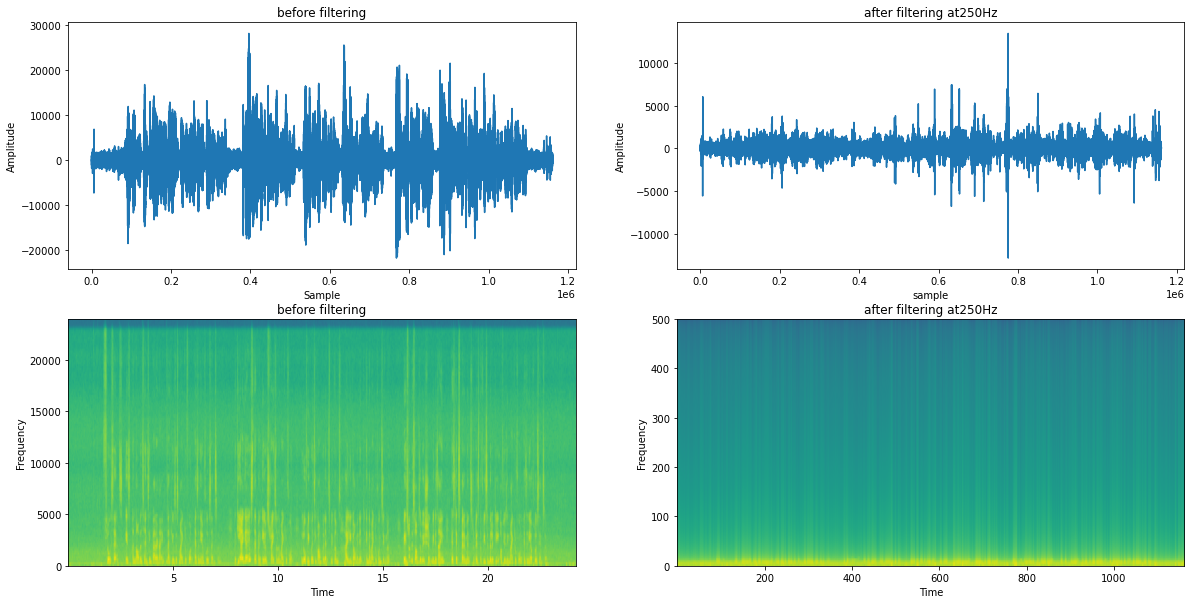

In [24]:
#only filter

output = Filter(signalData,250)
wavfile.write(os.path.join("./", f'new_filtered_{WAV_FILE_NAME}'), samplingFrequency, output)